Reading WhatsApp text file at 0.0 seconds.
Generating pandas dataframe from text file at 0.01000070571899414 seconds.
Initalising word cloud object at 0.034002065658569336 seconds.
Generating word cloud at 0.8930511474609375 seconds.
Saving word cloud image "my_world_cloud.png" at 18.743072032928467 seconds.
Displaying word cloud image at 20.61017894744873 seconds.


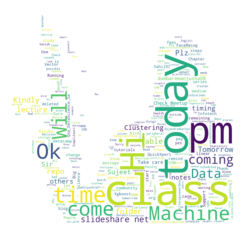

<Figure size 432x288 with 0 Axes>

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 27 21:53:13 2018

Word Cloud Maker:

@author: Filippo Di Paola
"""


import pandas as pd 
import time
import matplotlib.pyplot as plt
import sys
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np

def generate_word_cloud(file_name, output_file_name):   
    start_time = time.time()
    
    print("Reading WhatsApp text file at %s seconds." %(time.time() - start_time))
    try:
        data = pd.read_csv(file_name, sep='\n', header=None)
    except:
        print("\n\nThe file you have enter does not exist, make sure you've typed the name of the file correctly.")
        sys.exit(1)
    timestamp = data[0].map(lambda x: x[:18])
    data[0] = data[0].map(lambda x: x[20:])
    
    print("Generating pandas dataframe from text file at %s seconds." %(time.time() - start_time))
    df = pd.DataFrame(data[0].str.split(':',1).tolist(),
                                       columns = ['Name','Message'])
    df['Timestamp'] = timestamp
    df['Date'] = timestamp
    
    text = df['Message'].to_string()
    
    # Here you can create a word cloud for each individual in the text.
    # Edit the field "Enter Contact Name...." with the persons name saved
    # in WhatsApp, for example if you had a friend called "John Smith", enter
    # that in the field.
    #text_person_1 = df[(df.Name == "Enter Contact Name for person 2")][['Message']]['Message'].to_string()
    #text_person_2 = df[(df.Name == "Enter Contact Name for person 2")][['Message']]['Message'].to_string()
    
    
    # Here you can add more stopwords, these words will be removed from the word
    # cloud. For example if the word "hello" is shown, but it is a common word you
    # can add it to the stopword by adding stopwords.add("hello")
    thisset = {'https', 'none', 'git','tomorrow','dtype','omitted','Media','Yeah','okay','maybe','one','github'}
    stopwords = set(STOPWORDS)
    for i in thisset:
        stopwords.add(i)
    #stopwords.add('dtype')
    #stopwords.add('omitted')
    #stopwords.add('Media')
    #stopwords.add('Yeah')
    #stopwords.add('know')
    #stopwords.add('okay')
    #stopwords.add('maybe')
    #stopwords.add('one')
    print("Initalising word cloud object at %s seconds." %(time.time() - start_time))
    img=np.array(Image.open(requests.get('https://internationalcriminallaw.files.wordpress.com/2013/04/terrorism.png', 
                stream=True).raw))
    wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=2500,
                              mask=img,
                              height=2200,
                              max_words=500,
                             )
    print("Generating word cloud at %s seconds." %(time.time() - start_time))
    wc.generate(text)
    # Uncomment these if you want to see an individuals most used words.
    #wc.generate(text_person_1)
    #wc.generate(text_person_2)
    
    # This will save the word cloud to a png image. You can change the name as you
    # see fit.
    print("Saving word cloud image \"%s\" at %s seconds." %(output_file_name ,time.time() - start_time))
    wc.to_file(output_file_name)
    
    print("Displaying word cloud image at %s seconds." %(time.time() - start_time))
    fig = plt.figure(1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()

if __name__ == "__main__":
    text_file_name = "input.txt" # Enter the WhatsApp exported file name here!
    output_file_name = "my_world_cloud.png" # Enter the name of the output image here!
    generate_word_cloud(text_file_name, output_file_name)

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
